# RCM Dashboard Overview
This notebook provides a high-level walkthrough and user manual for the **RCM (Revenue Cycle Management) Dashboard** built in R using Shiny.

The dashboard is designed to monitor financial performance across states and Payors, track trends over time, and project future revenues using forecasting models.


### View the Live Application

To interact with the full dashboard and explore the features described above, visit the live version of the application:

👉 https://rcmreports.shinyapps.io/rproject/

The live Shiny app allows for real-time filtering, forecasting, and exporting using your own uploaded data or preloaded demo content.


## How to Use the Dashboard
1. **Upload your RCM dataset** via the file input.
2. **Map the columns** using the pop-up modal that appears when the app starts.
3. Use the left sidebar filters to drill down by:
   - State
   - Month/Quarter
   - Payor
   - Procedure
4. Navigate through the tabs to explore different metrics:
   - Value Boxes
   - State-Level Trends
   - Payor Distributions
   - Forecasting and Projections


##  Column Mapping (Auto-Detection Modal)
**When it appears:**
- On first load or when uploading a file

**Function:**
- Automatically tries to match column names (e.g., 'Total_Billed' ≈ 'Billed')
- Users can override or confirm

**Columns Required:**
- Month
- Amount Billed
- Expected Amount
- Paid Amount
- State
- Facility
- Insurance Product
- Insurance Payor
- Procedure Code or Procedure Type
- Number of unique patients for the given row

>Column header names do not have to match.  The mapping function will map according to user's choice

**Tech:**
- Modal UI built using `shiny::modalDialog()`
- Matching logic in `utils/mapping.R`

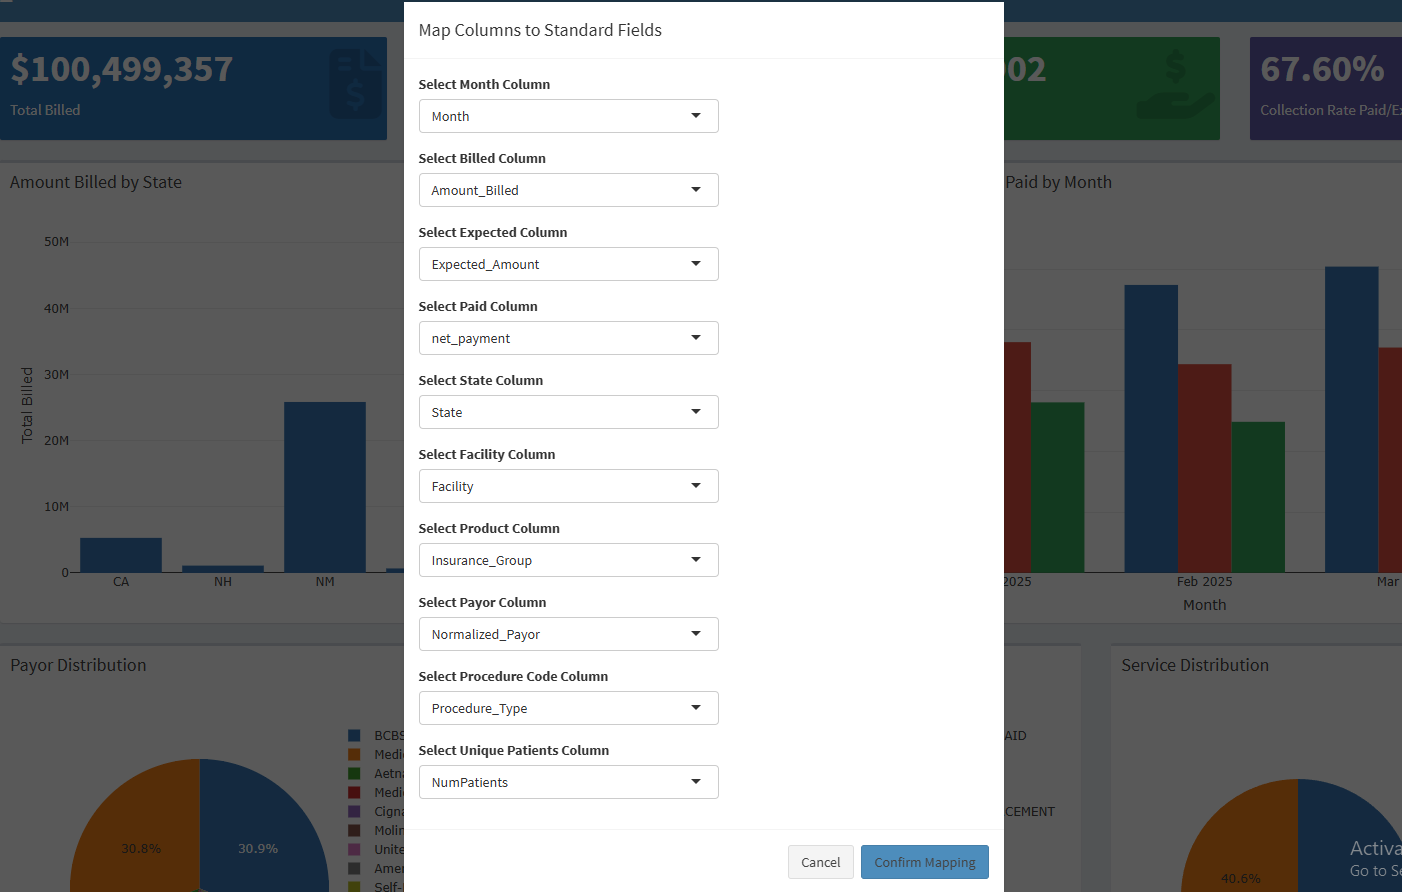

##  Date Range Controls (Top vs Bottom Inputs)

**There are two separate date range inputs in the dashboard, and they serve different but coordinated purposes.**

---

###  Top Date Range Input — `Date Range`
- This is the **main control** for the date range of the entire report.
- It defines the **range used for forecasting and projections**.
- The **projection chart only uses this date range**.

---

###  Bottom Date Range Input — `Report Date Range`
- This controls the range of **all other charts** (billing, expected, Payors, etc.).
- It defines what part of the data is **visible across the dashboard**, except for the projection.

---

###  Rule of Range Overlap: "The Smaller One Wins"
- If one date range ends before the other, **that smaller overlap is used** for most charts.
-  Example:
  - Top `Date Range`: **Jan 2023 – Mar 2024**
  - Bottom `Report Date Range`: **Jan 2023 – Jan 2024**
  -  The charts (except the projection) will show data only through **Jan 2024**.

- The **projection chart still uses the full top range**, even if other charts cut off sooner.

---

This setup allows you to:
- Analyze a **narrower period** on the dashboard
- While still projecting **beyond that period** in the forecast


##  Value Boxes
**What it shows:**
- Total Billed
- Total Expected
- Total Paid
- Collection Rate

**How it's calculated:**
- Uses filtered data and sums over selected time periods.
- Reactively updates when filters change.
- Collection Rate calculated from Paid / Expected.

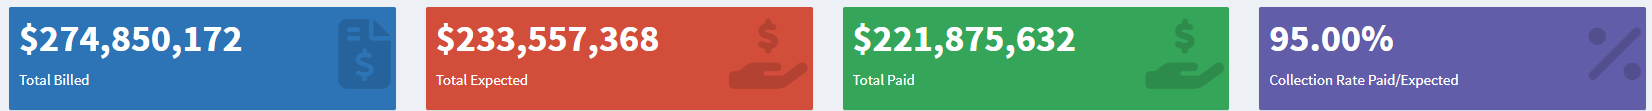

## Amount Billed by State and Billed/Expected/Paid by Month

This section displays two column charts side by side, providing a high-level view of financial performance across geography and time.

---

### Chart 1: Amount Billed by State

**Purpose:**
- Visualizes total billed amounts across different states.
- Helps identify geographic trends and high-performing regions.

**Details:**
- Data is grouped by `State` and aggregated by `Total Billed`.
- Each bar represents a state’s total billing volume within the selected date range.

**User Interaction:**
- Hover to view the exact billed total for each state.
- Use mouse selection to zoom into a specific region or set of states.

---

### Chart 2: Amount Billed, Expected, and Paid by Month

**Purpose:**
- Tracks billing trends over time, allowing for historical and seasonal analysis.
- Enables comparison between billed, expected, and actual paid values.

**Details:**
- Data is grouped by `Month` and stacked or clustered by billing category (`Billed`, `Expected`, `Paid`).
- Reflects changes in collection efficiency and revenue cycle timing.

**User Interaction:**
- Hover to compare billed vs. expected vs. paid values for each month.
- Click-and-drag to zoom into a specific date range for closer inspection.

---

These two charts are designed to be used together:  
While the first highlights **where** your revenue is coming from, the second helps you understand **when** and **how consistently** revenue is being recognized or collected.


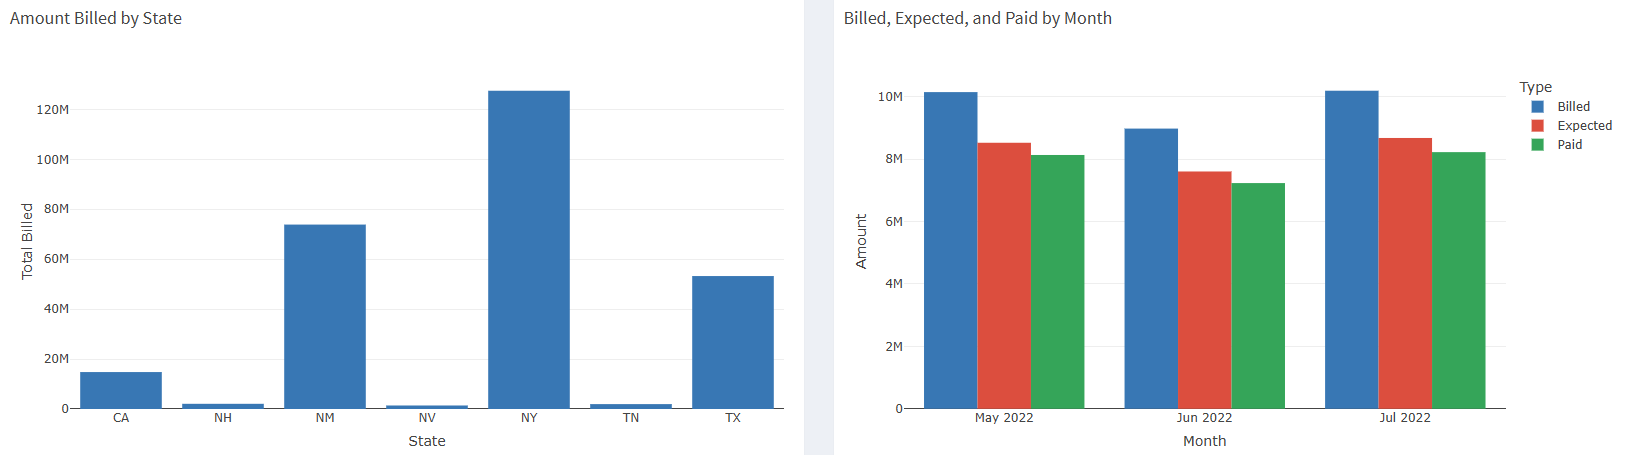

## Payor, Product, and Service Distribution by State

This section contains three visualizations side by side, offering insight into the composition of your billed or expected amounts by **payor**, **product type**, and **service category**.

---

### Payor Distribution

**Purpose:**  
- Illustrates the share of total volume or revenue attributed to each insurance payor.  
- Useful for understanding payor mix concentration and dependency.

**Details:**  
- Displayed as a pie chart.  
- Each slice represents a single payor's percentage of the total for the selected state or report-wide if no state filter is applied.  
- Data weighted by expected values.

---

### Product Distribution

**Purpose:**  
- Breaks down the financial volume by product type (e.g., Managed Medicaid, Commercial, Medicare).  
- Helps evaluate where revenue is coming from across payor product lines.

**Details:**  
- Grouped by payor product classification.  
- Useful for identifying trends in risk-bearing vs. fee-for-service contracts or government vs. private coverage.

---

### Service Distribution

**Purpose:**  
- Displays how services are split by category, such as Lab, Imaging, and Medical.  
- Useful for operational analysis, staffing alignment, and investment planning.

**Details:**  
- Pie chart representation showing each service line’s contribution to overall revenue.  
- Helps determine the focus area of your practice or facility.

---

### Interactive Features

- Hover to view exact percentages and category names.  
- Adjust state or report filters to recalculate chart values dynamically.  
- Visuals are tightly integrated with filter selections across the dashboard.

---

These charts together provide a high-level overview of your organization’s **payor landscape**, **product exposure**, and **clinical service mix**, enabling quick analysis of coverage trends and strategic positioning.


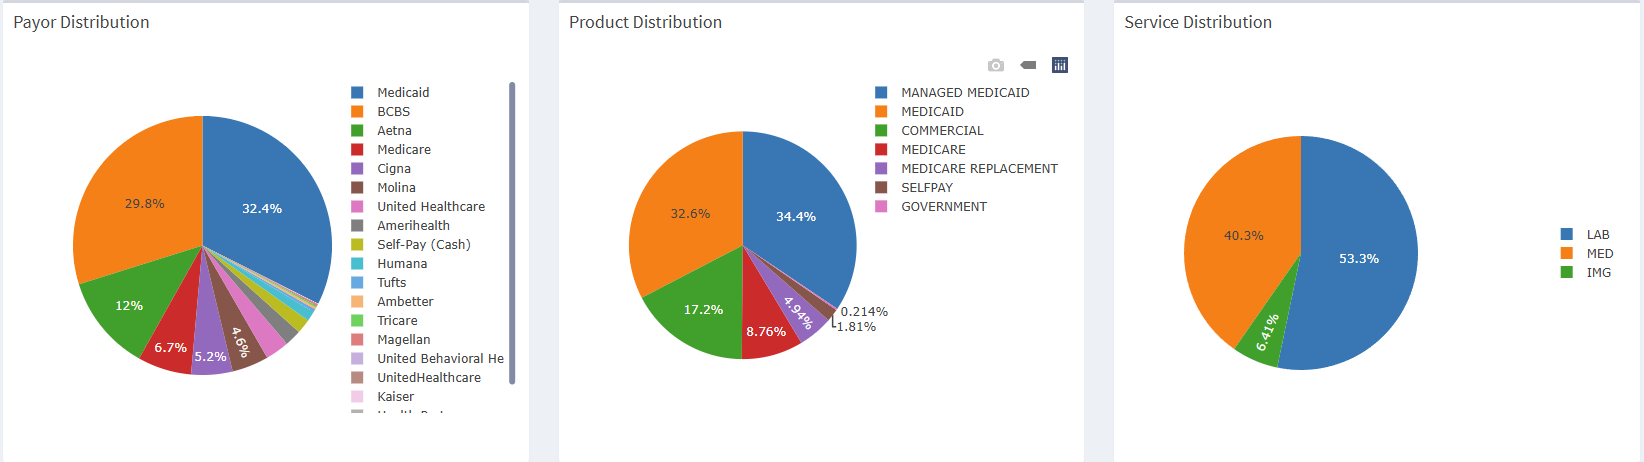

## Monthly and Quarterly Trends

This line chart provides a clear visualization of billing cycle patterns over time. It is designed to help users assess revenue performance month-over-month and quarter-over-quarter by displaying the relationship between **Billed**, **Expected**, and **Paid** amounts.

---

### Chart Purpose

- Track historical financial trends across key performance categories.
- Identify seasonal fluctuations, growth periods, or downturns.
- Compare the gap between amounts billed, amounts expected to be collected, and actual payments received.

---

### Chart Details

- Data is grouped by **Month**.
- The chart includes three lines:
  - **Billed** (typically the highest) — Total amount invoiced
  - **Expected** — Amount estimated to be collectible based on payor contracts and terms
  - **Paid** — Actual revenue collected

---

### User Interactions

- **Hover** over any data point to view precise dollar values.
- **Click and drag** to zoom into a specific time frame.
- Enable **cumulative mode** to track revenue progression over time.

---

This chart is valuable for revealing timing gaps between services rendered and payments received, helping stakeholders make data-driven decisions around cash flow management, payor follow-up, and forecasting.


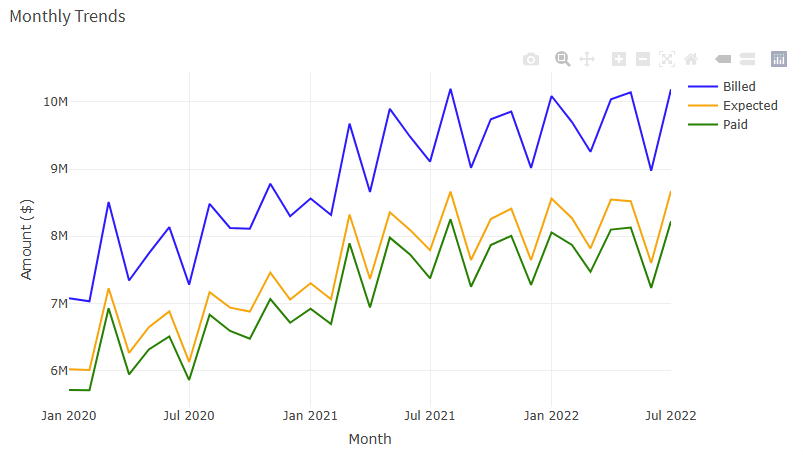

## Forecasting & Projection Tools

The projection chart provides forward-looking estimates based on historical billing trends. It leverages an **ARIMA (AutoRegressive Integrated Moving Average)** model to produce reliable short-term forecasts, typically spanning 3 to 6 months.

---

### Forecast Model

- **Model Used:** ARIMA
- **Forecast Period:** 3 to 12 months
- **Forecasted Variable:** Projected Billed Amount (can be expanded to Expected or Paid)

---

### Interactive Features

- The base forecast line is generated from historical data.
- Users can overlay **custom adjustment series** to simulate alternative outcomes.
- Adjustments are added using the **"Adjust Projection"** button after selecting or creating a series.

---

### Adjustment Types Supported

- **By Payor** – Apply a straight % change based on a specific payor’s share of billed revenue.
- **By Census** – Model monthly census growth using both % and fixed patient count increases.
- **By Start Date** – Define when each adjustment begins affecting the projection.

Each adjustment:
- Is tied to a unique projection series.
- Can be layered over time and reviewed individually.

---

### Managing Series

- **Add Series** to create new projection lines.
- **View Adjustments** to inspect or delete individual changes.
- **Delete Series** to remove a scenario from the chart entirely.
- The chart will reflect all active series at once for side-by-side scenario comparison.

---

### Global Shift Control

A global **% shift adjustment** can be applied to the baseline forecast to account for known corrections (e.g., margin compression, budget conservatism).

Example: Applying `-5%` simulates an across-the-board revenue contraction.

---

This tool enables teams to model strategic decisions, assess best/worst-case scenarios, and plan around operational or payor-driven shifts in revenue.


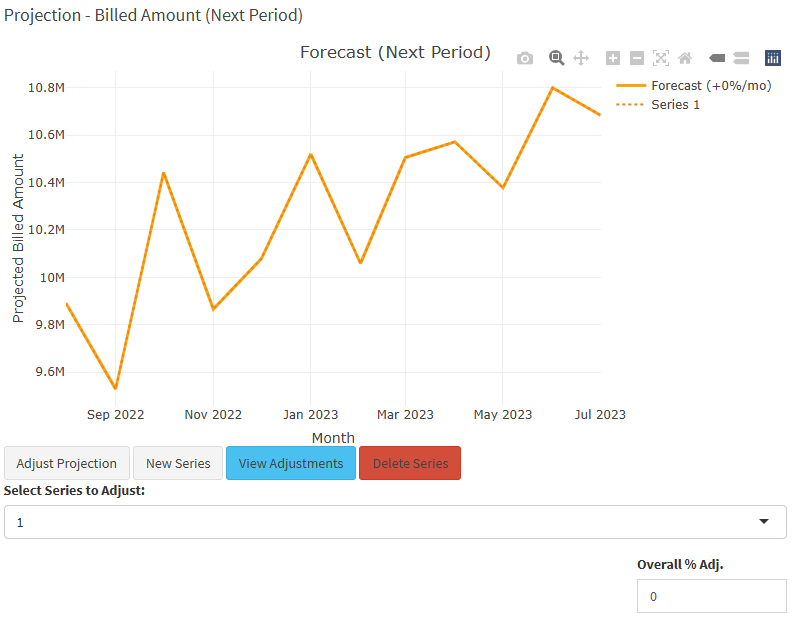


## Using the Projection Chart and Global Adjustment (% Shift)

The **Projection Chart** displays projected billed amounts based on historical data using an ARIMA (AutoRegressive Integrated Moving Average) time series model. This chart provides dynamic, forward-looking financial forecasting with customizable overlays.

---

### What the Chart Shows

- A **baseline ARIMA forecast** based on historical billing patterns.
- Optional **adjustment series** that model specific changes such as census growth or payor contract shifts.
- A visual comparison between the original forecast and alternative projection scenarios.

---

### Global % Shift (Bottom-Right Input)

In the bottom-right corner of the projection chart panel, you’ll find an input labeled **Accumulated % Shift**. This global control allows you to apply a flat percentage adjustment across the entire projection.

#### Purpose

- Quickly adjust the entire forecast up or down without modifying series-level adjustments.
- Useful when accounting for broad factors such as:
  - Payor-wide contract renegotiations
  - Inflation/deflation
  - Systemic reimbursement changes
  - Strategic budgeting corrections

#### How It Works

- The percentage entered is applied **uniformly** across all forecasted data points.
- This does **not** alter any specific adjustment series—it acts as a macro-level correction layer.

#### Example Scenarios

- Entering `-5%` applies a 5% downward correction to the entire projection.
- Entering `+10%` increases all forecasted amounts by 10%.

This is a convenient method to simulate market-wide or internal policy impacts without building out additional adjustment series.

> The chart below reflects the same forecast, but with a **-0.5% shift** applied globally to simulate slight underperformance across all future months.



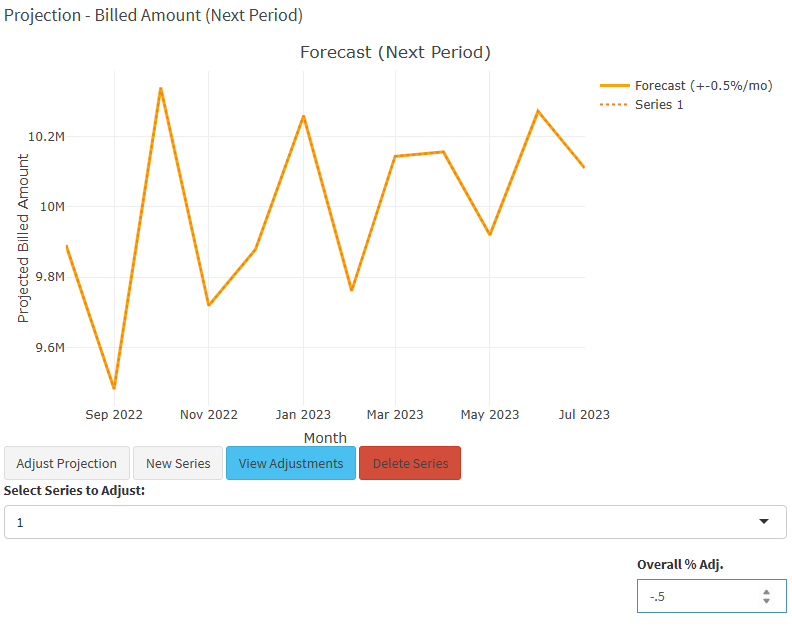

## Managing Projection Series: Add, Select, Delete

You can add multiple **projection series** to explore different forecast scenarios. Each series can contain custom adjustments.

---

###  Add a Series
Click the **"Add Series"** button above or near the projection chart.

- Each new series appears in a distinct color
- A unique name or ID is generated for clarity

---

###  Select a Series
Click on the **dropdown list** to select a series.
- Once selected, any adjustments you apply will target that specific series.
- Only one series can be modified at a time.

---

###  Delete a Series
Click the **"Delete Series"** button with the selected series highlighted.

-  **Warning**: If you delete all series:
  - The projection chart will go blank
  - Adjustment panels will become inactive
  - Always **re-add a series before applying adjustments**

---

 Think of each series as a separate "what-if" scenario — you can compare them visually to assess different outcomes.


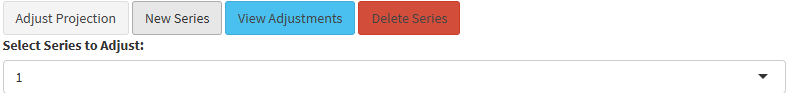

## Adding Adjustments to a Series (Fine-Tuning Forecasts)

Once a projection series is selected, you can apply adjustments to simulate future changes in revenue or volume. These adjustments modify the baseline ARIMA forecast to reflect real-world conditions or strategic assumptions.

---

### How to Add an Adjustment

1. Use the dropdown to **select the projection series** you want to modify.
2. Click the **"Adjust Projection"** button.
3. In the adjustment panel, choose one of the two adjustment types:
   - **Payor Adjustment**
   - **Census Adjustment**
4. Complete the form with the necessary fields, then submit to apply the adjustment.

---

### Adjustment Types

#### Payor Adjustment

Use this to apply a change in reimbursement rates from a specific payor.

**Fields Required:**
- **Payor** – The insurance payor affected by the change.
- **Adjustment (%)** – The percentage increase or decrease (e.g., +5%, -10%).
- **Start Date** – When the adjustment takes effect.

**How it Works:**
- The adjustment is applied as a **flat shift** to that payor’s weighted contribution.
- The impact is proportional to the payor's share of total receivables.
- This provides a realistic financial shift without over- or under-weighting the adjustment.

**Example:**
> If Medicare is expected to increase reimbursement by 3% starting January 2024, applying a +3% payor adjustment to Medicare models that impact within the forecast.

**Benefits:**
- Allows you to account for known or anticipated rate changes.
- Produces more accurate projections tied to specific contract terms.


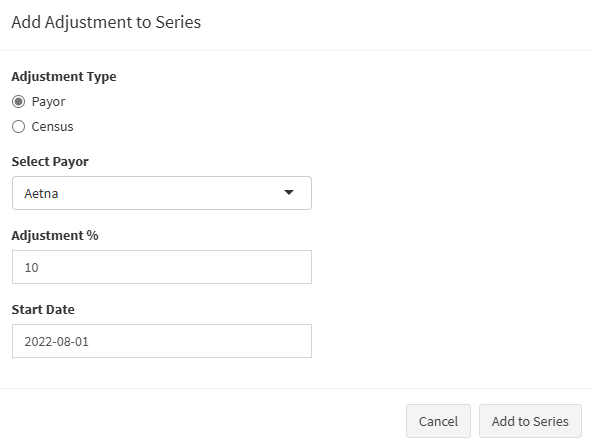
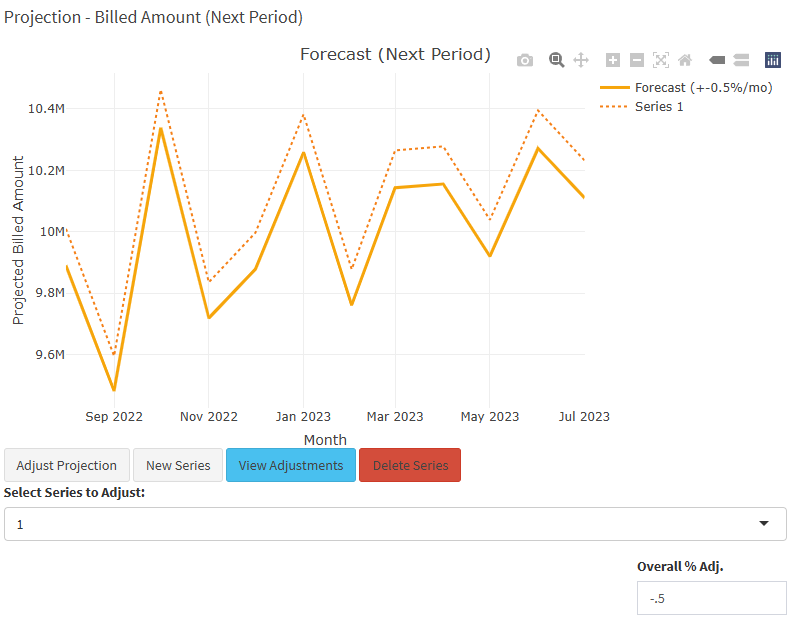



####  **Census Adjustment**
- **Fields:**
  - Select a **State**
  - Enter a **% Growth** (monthly compounding)
  - Enter a **Census Count** (absolute increase per month)
  - Select a **Start Date**
- **How it Works:**
  - % Growth is **compounded monthly** from the start date forward.
  - Census Count adds a **fixed number of new patients each month**.
  - If both are entered, the impact is applied to the **projected census value per state**, adjusted for **value per patient**.
- **Why it’s Useful:**
  - Excellent for modeling **expansion**, **seasonal growth**, or **staffing changes** that will affect total visits or procedures.

---



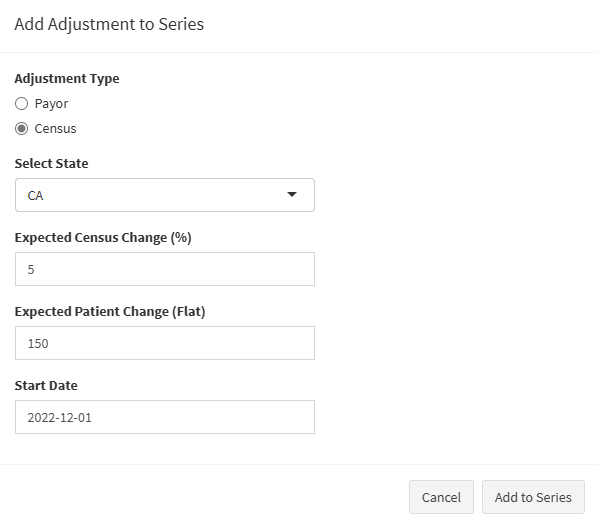
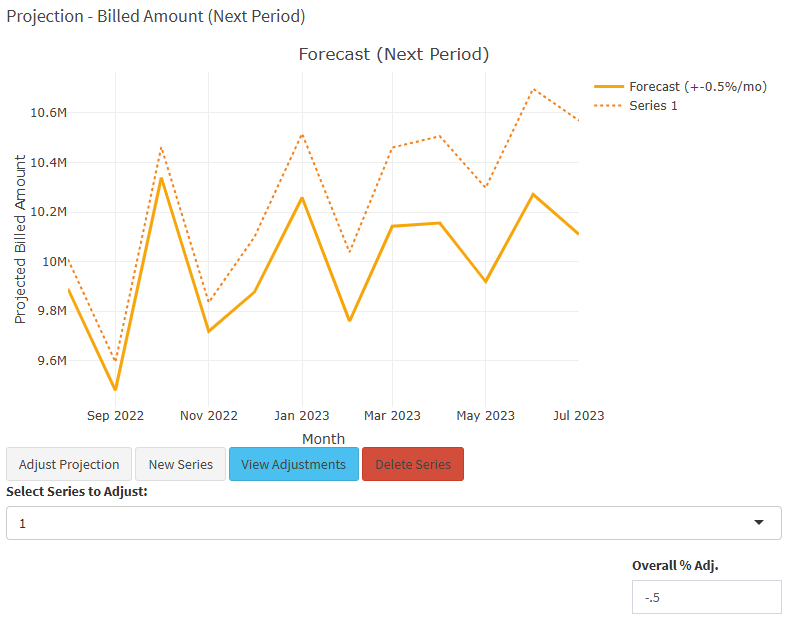


###  Adjustment Mechanics
- Adjustments apply **only to the currently selected series**.
- Each adjustment has its **own start date** and takes effect independently.
- You can apply **multiple adjustments to one series** for layered, scenario-based modeling.
- Adjustments can be **viewed and deleted individually** using the adjustment list panel.

---

###  Example Scenarios
- **Jan 2024** → Payor A receives **+5% rate increase**
- **Apr 2024** → Texas census grows by **3% monthly**, plus **15 new patients/month**

→ Your projection line will reflect **both** adjustments starting on their respective dates, with real impact based on the weight of that Payor and state in your historical data.

---

 **Tip:** Always verify your selected series before applying or reviewing adjustments. Adjustments won’t take effect until they are tied to a valid, active series.


### Viewing and Deleting Adjustments

After selecting a projection series and clicking **"View Adjustments"**, a list of all applied adjustments will be displayed as shown above.

- Each adjustment includes its **type**, **start date**, and **details** (e.g., payor, state, percentage).
- To remove an adjustment from the series, click the red **"Delete"** button next to it.
- Adjustments are deleted individually and only affect the selected series.



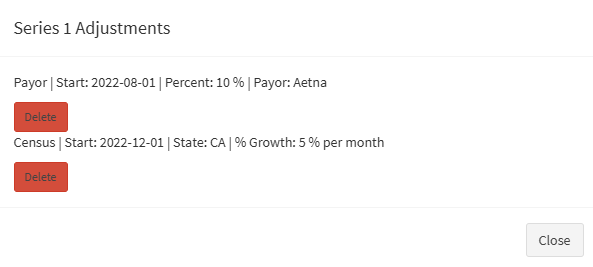

### Managing Multiple Projection Series

The dashboard allows users to create and compare multiple projection series—each representing a unique scenario with its own set of adjustments.

The **dropdown labeled "Select Series to Adjust"** indicates which series is currently active for editing. In the example above, **Series 5** is selected. 

- Adjustments made using the "Adjust Projection" button will apply only to this series.
- Use the dropdown to switch between series as needed.
- This structure allows for direct side-by-side comparison of different forecast strategies or assumptions.


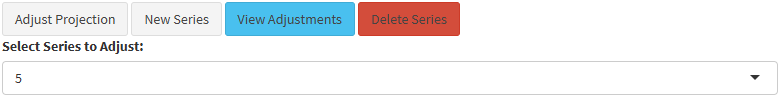

### Detailed Table View

At the bottom of the dashboard, a **detailed data table** displays the underlying dataset used throughout the report.

- Each row represents a unique record tied to a combination of **date, payor, product, procedure, and facility**.
- The table includes columns for key values such as **Billed**, **Expected**, **Paid**, and **Unique Patients**.
- Users can **search, sort, and paginate** the data for deeper analysis.
- This view provides transparency and allows users to validate totals seen in charts above.

This table is especially useful for spot-checking anomalies, exporting specific subsets, or reviewing billing data at a granular level.


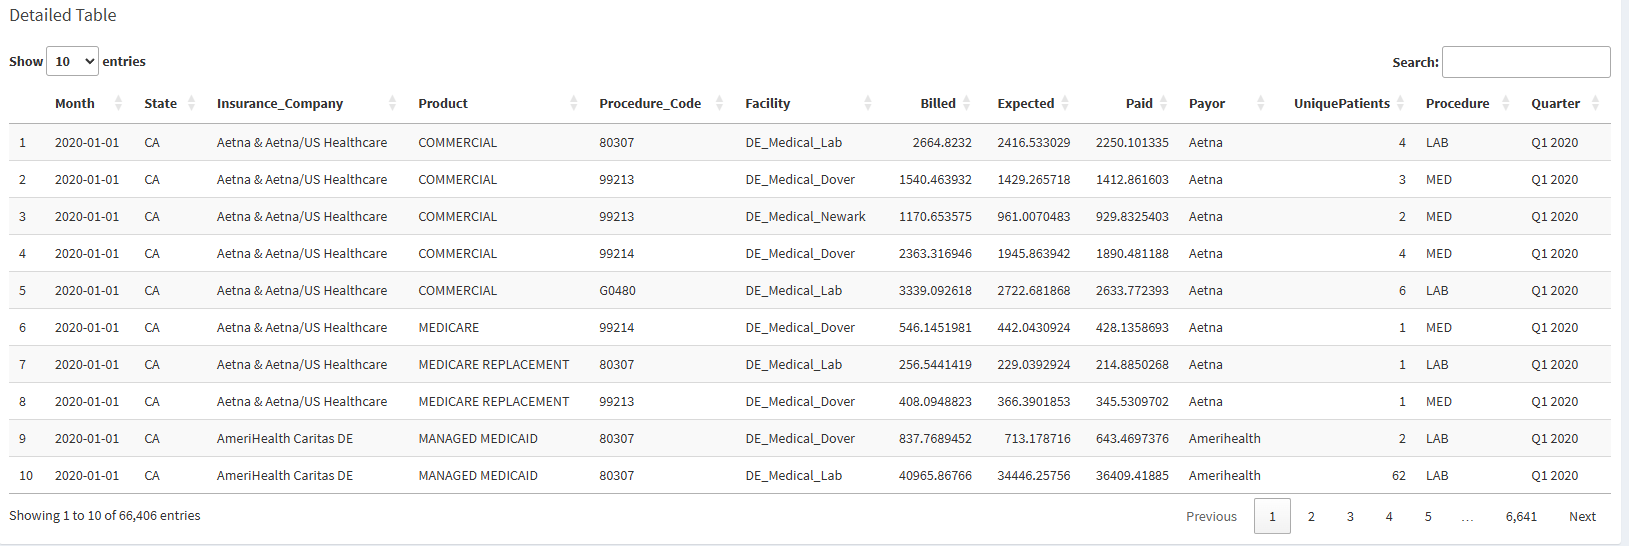